In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [23]:


df = pd.read_csv("PS_2026.02.09_09.53.13.csv", comment="#")

print("Shape:", df.shape)
print(df.columns)


Shape: (746, 92)
Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masser

In [38]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (746, 1986)


In [39]:
df.drop(columns=[
    'pl_refname',
    'st_refname',
    'sy_refname',
    'rastr',
    'decstr'
], errors='ignore', inplace=True)
print("Shape after removing columns:", df.shape)


Shape after removing columns: (746, 1986)


In [40]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna("Unknown")


In [28]:
df = pd.get_dummies(df, drop_first=True)


In [29]:
target = 'disc_year'

X = df.drop(target, axis=1)
y = df[target]


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.45653872485932856


In [33]:
importances = model.feature_importances_

feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names)

top_features = feat_imp.sort_values(ascending=False).head(10)
print(top_features)


sy_pnum               0.106302
dec                   0.078386
sy_kmag               0.041037
st_met                0.028143
sy_gaiamag            0.026555
pl_pubdate_2025-07    0.024818
st_logg               0.020143
st_loggerr1           0.018577
sy_vmag               0.018545
st_masserr1           0.018028
dtype: float64


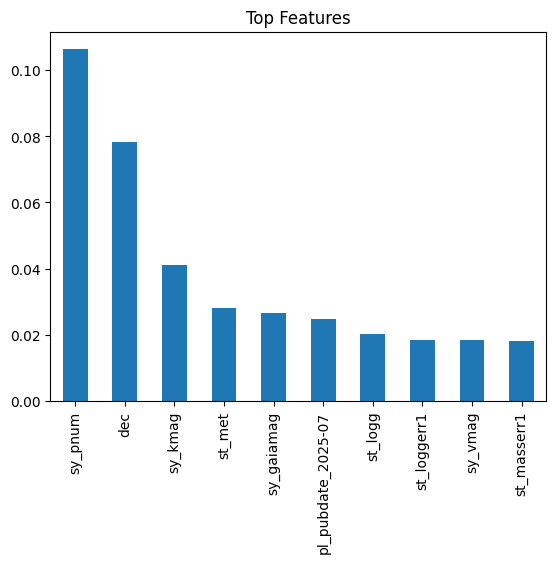

In [34]:
top_features.plot(kind='bar')
plt.title("Top Features")
plt.show()


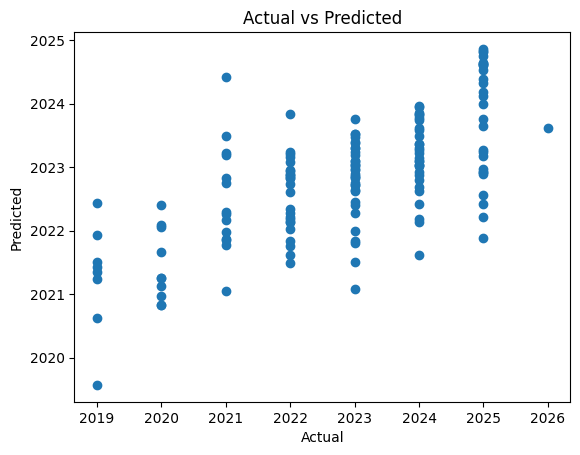

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()
